## 平滑化フィルタ


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


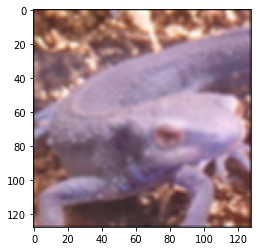

In [7]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

def average_filter(img, K_size=3):
    if len(img.shape)==3:
        H, W, C = img.shape
    else :
        img = np.expad_dims(img, axis=-1)
        H, W, C = img.shape
        
    # zero padding
    pad = K_size//2
    out = np.zeros((H+2*pad, W+2*pad, C))
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.uint8)
    
    tmp = out.copy()
    
    # prepare filter 
    K = np.ones((K_size,K_size)) / K_size**2
    print(K)
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[y, x, c] = np.sum(K*tmp[y:y+K_size, x:x+K_size, c])
    out = out[:H, :W].astype(np.uint8)
    
    return out

img = cv2.imread('../imori.jpg')
out = average_filter(img, K_size=3)

cv2.imwrite('out11-1.jpg', out)
plt.imshow(out)

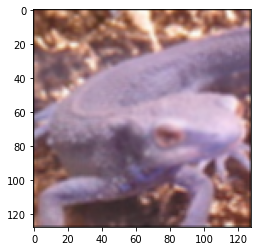

In [8]:
import cv2
import numpy as np

# mean filter
def mean_filter(img, K_size=3):
    H, W, C = img.shape

    # zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
    tmp = out.copy()

    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.mean(tmp[y: y + K_size, x: x + K_size, c])

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

# Read image
img = cv2.imread("../imori.jpg")

# Mean Filter
out = mean_filter(img, K_size=3)

# Save result
cv2.imwrite("out11-2.jpg", out)
plt.imshow(out)